<a href="https://colab.research.google.com/github/maddiejane25/Project-2/blob/dev/KM_HeartAttackData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Upload the csv file
from google.colab import files
uploaded = files.upload()

Saving heart_attack_prediction_dataset.csv to heart_attack_prediction_dataset.csv


In [9]:
# Import the csv file
df = pd.read_csv("heart_attack_prediction_dataset.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [11]:
df.isnull().sum()

,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


In [12]:
df.shape

(8763, 26)

In [13]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


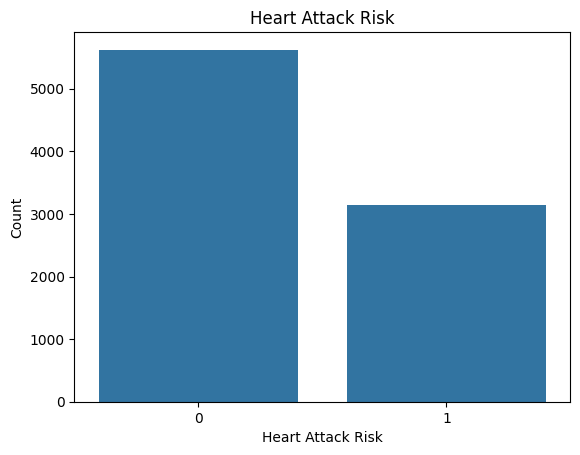

In [14]:
# Distribution
sns.countplot(x='Heart Attack Risk', data=df)
plt.title('Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')
plt.show()

In [15]:
# Use only necessary columns
df=df[['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity','Alcohol Consumption',
           'Exercise Hours Per Week','Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI', 'Triglycerides','Heart Attack Risk']]
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,BMI,Triglycerides,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,31.251233,286,0
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,27.194973,235,0
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,28.176571,587,0
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,36.464704,378,0
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,21.809144,231,0


In [16]:
# Separate Blood pressure into 2 columns
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df = df.drop('Blood Pressure', axis=1)

In [17]:
# Encode Sex, Diet
label_econder = LabelEncoder()
df['Sex'] = label_econder.fit_transform(df['Sex'])
df['Diet'] = label_econder.fit_transform(df['Diet'])
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,BMI,Triglycerides,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,1,208,72,0,0,1,0,0,4.168189,0,0,0,9,31.251233,286,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,2,1,0,1,27.194973,235,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,1,1,1,9,28.176571,587,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,0,1,0,9,36.464704,378,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,2,1,0,6,21.809144,231,0,91,88


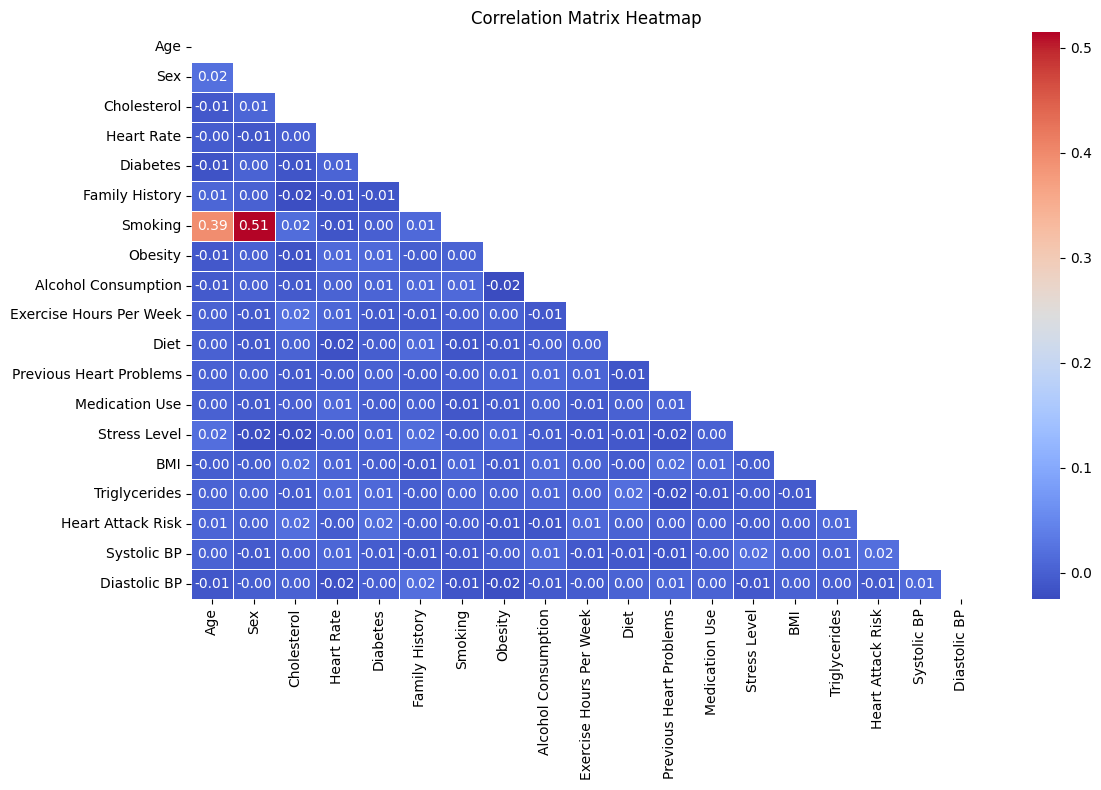

In [22]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
# Mask the upper side
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Create heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


In [23]:
# Top 5 correlations
correlations = corr_matrix['Heart Attack Risk'].sort_values(ascending=False)
top_correlations = correlations[1:6]
print(top_correlations)

Cholesterol                0.019340
Systolic BP                0.018585
Diabetes                   0.017225
Exercise Hours Per Week    0.011133
Triglycerides              0.010471
Name: Heart Attack Risk, dtype: float64


In [28]:
# Define x and y
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Split data to train model
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

# SMOTE for oversampling
over_sampler = SMOTE(random_state=1)
X_train_resample, y_train_resample = over_sampler.fit_resample(X_train, y_train)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# define models
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'SVM': SVC(),
          'KNN': KNeighborsClassifier()}

# train models
for name, model in models.items():
    model.fit(X_train, y_train)

# predict models
    pred = model.predict(X_test)

# calculate accuracy
    accuracy = accuracy_score(y_test, pred)
    print(f'{name} accuracy: {accuracy}')

Logistic Regression accuracy: 0.645367412140575
Decision Tree accuracy: 0.5458694659972615
Random Forest accuracy: 0.6284801460520311
SVM accuracy: 0.6462802373345504
KNN accuracy: 0.5837517115472387


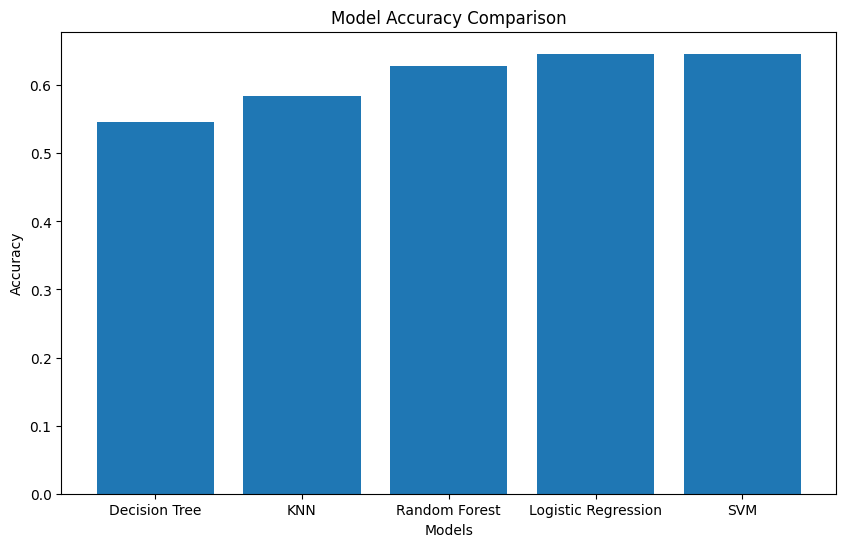

In [30]:
# Calculate accuracies and sort them
model_accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}
sorted_accuracies = dict(sorted(model_accuracies.items(), key=lambda item: item[1]))

# Bar Plot Comparison of Models (Ascending Order)
plt.figure(figsize=(10, 6))
plt.bar(sorted_accuracies.keys(), sorted_accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define target variable
target = 'Smoking'

# Store results
results = []

for column in df.drop(columns=[target]):
    X = df[['Heart Attack Risk']]
    y = df[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Store results
    results.append({'Feature': column, 'R-squared': r2, 'MSE': mse})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Sort by R-squared to identify the most predictive feature
results_df = results_df.sort_values(by='R-squared', ascending=False)


                    Feature  R-squared       MSE
0                       Age  -0.000798  0.098054
1                       Sex  -0.000798  0.098054
2               Cholesterol  -0.000798  0.098054
3                Heart Rate  -0.000798  0.098054
4                  Diabetes  -0.000798  0.098054
5            Family History  -0.000798  0.098054
6                   Obesity  -0.000798  0.098054
7       Alcohol Consumption  -0.000798  0.098054
8   Exercise Hours Per Week  -0.000798  0.098054
9                      Diet  -0.000798  0.098054
10  Previous Heart Problems  -0.000798  0.098054
11           Medication Use  -0.000798  0.098054
12             Stress Level  -0.000798  0.098054
13                      BMI  -0.000798  0.098054
14            Triglycerides  -0.000798  0.098054
15        Heart Attack Risk  -0.000798  0.098054
16              Systolic BP  -0.000798  0.098054
17             Diastolic BP  -0.000798  0.098054


Evaluating feature: Heart Attack Risk
R-squared for Heart Attack Risk: -0.0008
ROC AUC for Heart Attack Risk: 0.4996



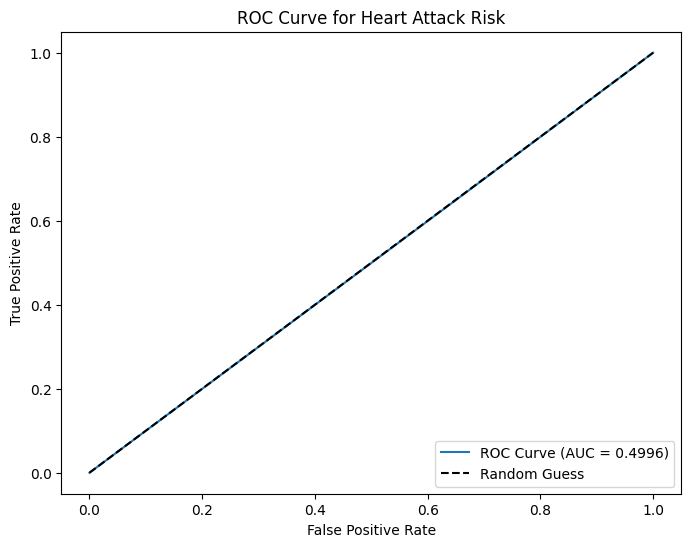

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Iterate over each feature
for column in X.columns:
    print(f"Evaluating feature: {column}")

    # Select one column as X
    X_2 = X[[column]]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions (for probabilities, use predict_proba if available)
    y_pred = model.predict(X_test)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    print(f"R-squared for {column}: {r2_score(y_test, y_pred):.4f}")
    print(f"ROC AUC for {column}: {auc_score:.4f}\n")

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {column}')
    plt.legend(loc='lower right')
    plt.show()


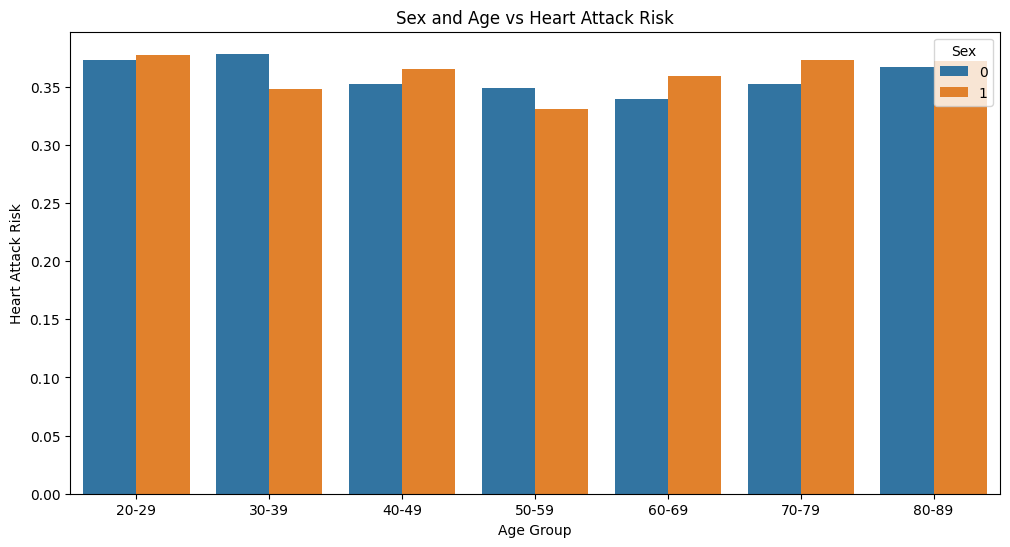

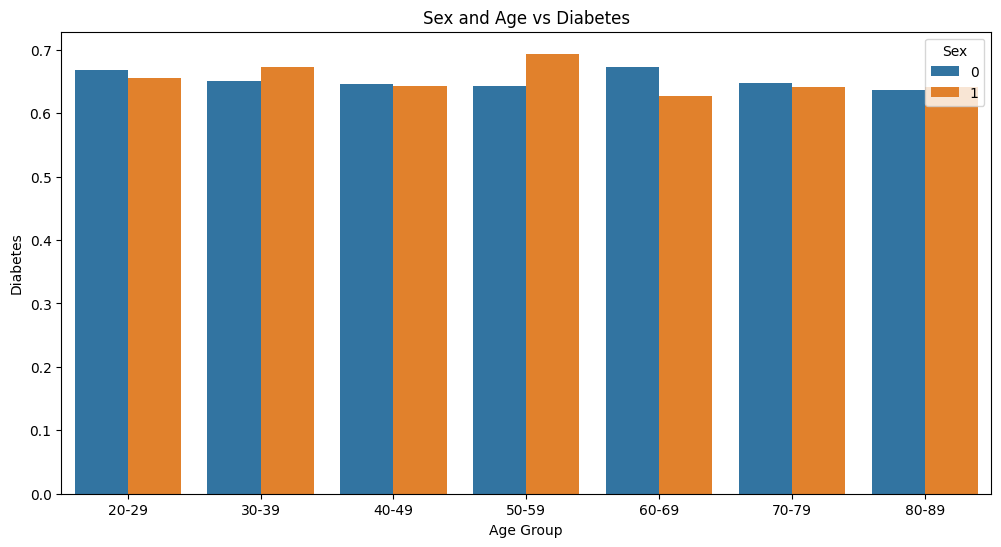

In [33]:
# Age Bins
df['Age Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])

# Bar plot for Sex and Age vs Heart Attack Risk
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Heart Attack Risk', hue='Sex', data=df, errorbar=None)
plt.title('Sex and Age vs Heart Attack Risk')
plt.xlabel('Age Group')
plt.ylabel('Heart Attack Risk')
plt.legend(title='Sex', loc='upper right')
plt.show()


# Bar plot for Sex and Age vs Diabetes
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Diabetes', hue='Sex', data=df, errorbar=None)
plt.title('Sex and Age vs Diabetes')
plt.xlabel('Age Group')
plt.ylabel('Diabetes')
plt.legend(title='Sex', loc='upper right')
plt.show()

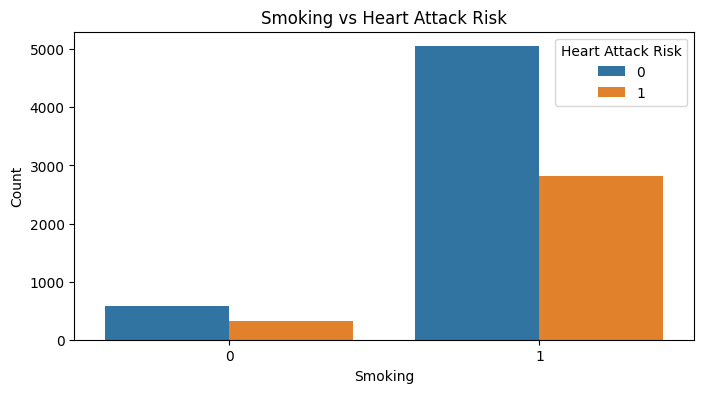

In [38]:
# Smoking vs Heart Attack Risk
plt.figure(figsize=(8, 4))
sns.countplot(x='Smoking', hue='Heart Attack Risk', data=df)
plt.title('Smoking vs Heart Attack Risk')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

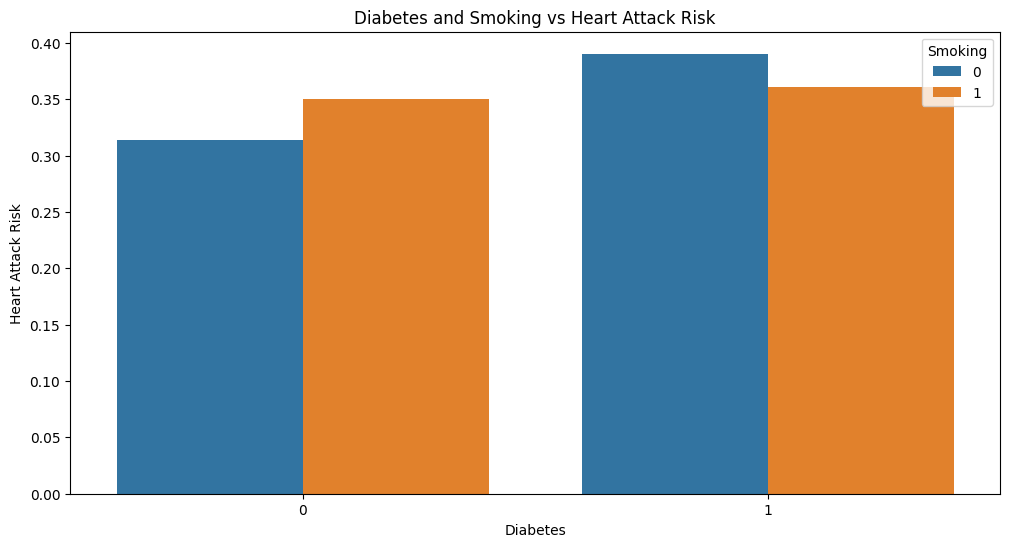

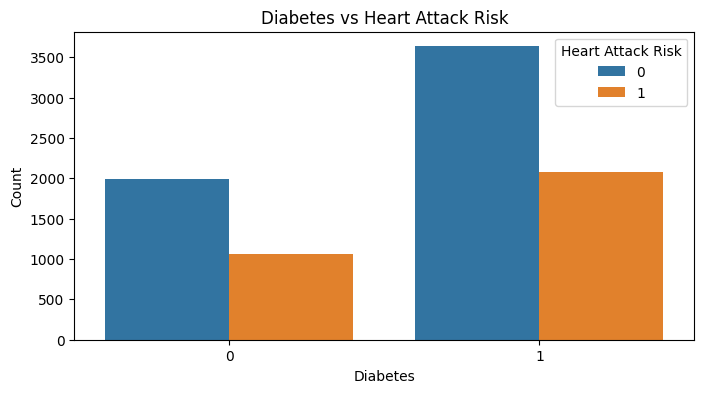

In [41]:
# Diabetes and Smoking vs Heart Attack Risk
plt.figure(figsize=(12, 6))
sns.barplot(x='Diabetes', y='Heart Attack Risk', hue='Smoking', data=df, errorbar=None)
plt.title('Diabetes and Smoking vs Heart Attack Risk')
plt.xlabel('Diabetes')
plt.ylabel('Heart Attack Risk')
plt.legend(title='Smoking', loc='upper right')
plt.show()


# Diabetes vs Heart Attack Risk
plt.figure(figsize=(8, 4))
sns.countplot(x='Diabetes', hue='Heart Attack Risk', data=df)
plt.title('Diabetes vs Heart Attack Risk')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

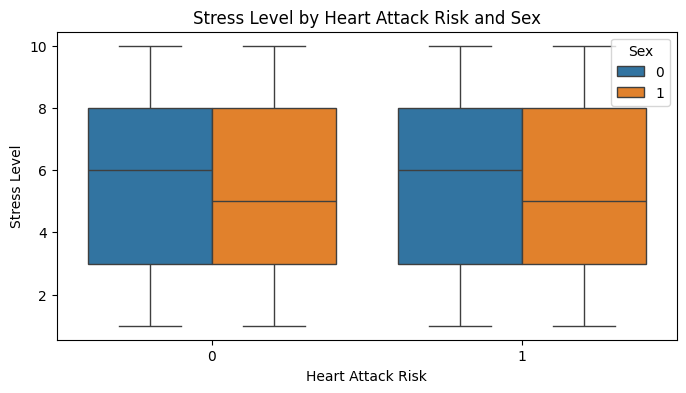

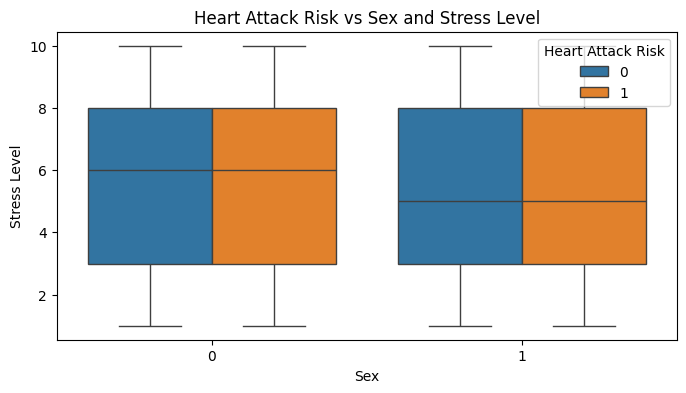

In [44]:
# Stress vs Heart Attack Risk
plt.figure(figsize=(8, 4))
sns.boxplot(x='Heart Attack Risk', y='Stress Level', hue='Sex', data=df)
plt.title('Stress Level by Heart Attack Risk and Sex')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Stress Level')
plt.legend(title='Sex', loc='upper right')
plt.show()


# Stress vs Heart Attack Risk
plt.figure(figsize=(8, 4))
sns.boxplot(x='Sex', y='Stress Level', hue='Heart Attack Risk', data=df)
plt.title('Heart Attack Risk vs Sex and Stress Level')
plt.xlabel('Sex')
plt.ylabel('Stress Level')
plt.legend(title='Heart Attack Risk', loc='upper right')
plt.show()

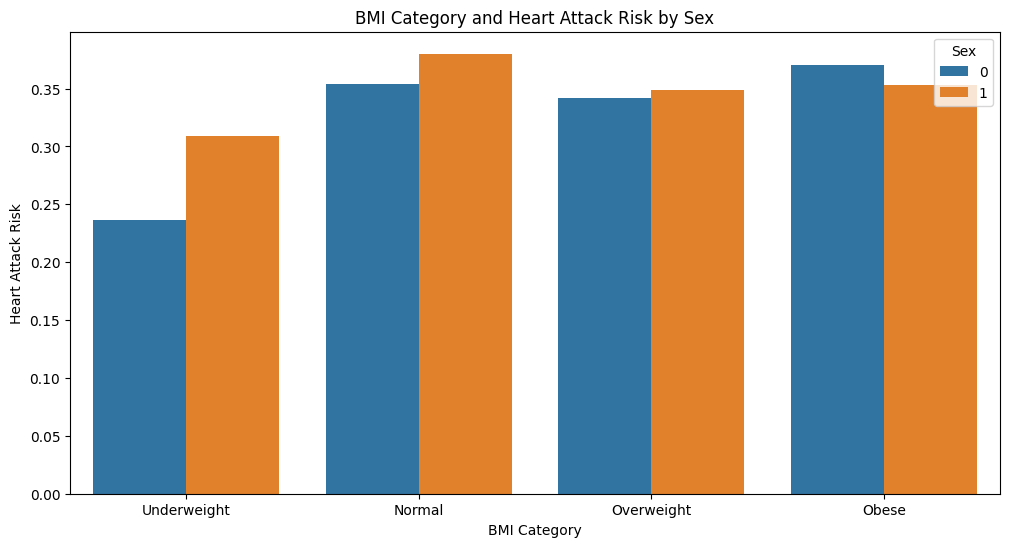

In [45]:
# BMI Bins
df['BMI Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# BMI Bins vs Heart Attack Risk
plt.figure(figsize=(12, 6))
sns.barplot(x='BMI Category', y='Heart Attack Risk', hue='Sex', data=df, errorbar=None)
plt.title('BMI Category and Heart Attack Risk by Sex')
plt.xlabel('BMI Category')
plt.ylabel('Heart Attack Risk')
plt.legend(title='Sex', loc='upper right')
plt.show()